# Data Mining - Lab 04

* Full name: Đinh Anh Huy
* Student ID: 18110103

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [6]:
def find_missing_percent(data , showresult = True):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    miss_df = pd.concat([total, percent], axis=1, keys=['TotalMissingValues', 'PercentOfMissing'])

    miss_df = miss_df[miss_df["PercentOfMissing"] > 0.0]
    miss_df = miss_df.reset_index().rename(columns={'index': 'ColumnName'})
    if(showresult):
        print("* Check missing values:")
        print(">> Shape of data: ", data.shape)
    if miss_df.shape[0] == 0:
        print(">> There is no missing value in this data.")
    else:
        print(">> The table of percentage of missing values:")
        display(miss_df)
    return miss_df

#### CustomerChurn Dataset

In [3]:
data = pd.read_csv('Dataset/telecom_churn.csv')


print(">> Display the first 5 rows of data:")
display(data.head())
print(">> Shape of data: ", data.shape)
print("   * Number of rows: ", data.shape[0])
print("   * Number of columns: ", data.shape[1])

>> Display the first 5 rows of data:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


>> Shape of data:  (3333, 20)
   * Number of rows:  3333
   * Number of columns:  20


**Variable Description**

| **Name** | **Description** | **Value Type** | **Statistical Type**|
|:- | :- | :- | :- |
| State | State Abbreviation (like KS - Kansas) | String | Categorical |
| Account length | How long the client has been with the company | Numerical | Quantiative |
| Area code | Phone number prefix | Numberical | Categorical |
| International plan | International Plan (on/off) | String. "Yes"/"No" | Categorical/Binary |
| Voice mail plan | Voice mail (on/off) | String. "Yes"/"No" | Categorical/Binary |
| Number vmail messages | Number of Voice mail messages | Numberical | Quantitative |
| Total day minutes | Total duration of daytime calls | Numberical | Quantitative |
| Total day calls | Total number of daytime calls | Numberical | Quantitative |
| Total day charge | Total charges for daytime services | Numberical | Quantitative |
| Total eve minutes | Total duration of evening calls | Numberical | Quantitative |
| Total eve calls | Total number of evening calls | Numberical | Quantitative |
| Total eve charge | Total charges for evening services | Numberical | Quantitative |
| Total night minutes | Total duration of nighttime calls | Numberical | Quantitative |
| Total night calls | Total number of nighttime calls| Numberical | Quantitative |
| Total night charge | Total charges for nighttime services | Numberical | Quantitative |
| Total intl minutes | Total duration of international calls | Numberical | Quantitative |
| Total intl calls | Total number of international calls | Numberical | Quantitative |
| Total intl charge | Total charges of international services | Numberical | Quantitative |
| Customer service calls | Number of calls to customer service | Numberical | Categorical/Binary |

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**Nhận xét:** 
* Bộ dữ liệu có 3333 dòng và 20 cột, trong đó cột `Churn` là label.
* Bộ dữ liệu `CustomerChurn` không có missing value do giá trị của các features ở cột `Non-Null Count` đều bằng với `entries`.

In [8]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


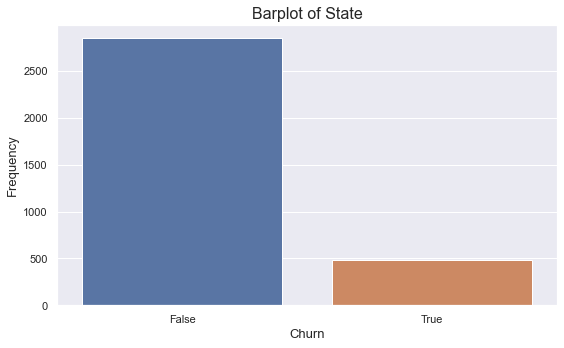

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn', data=data)
plt.xlabel('Churn', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Barplot of Churn', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Dữ liệu bị unbalanced do số lượng khách hàng số lượng khách hàng tiếp tục sử dụng và huỷ đăng ký dịch vụ viễn thông từ bộ dữ liệu không đều nhau. Chỉ có khoảng `15%` trên tổng số lượng khách hàng huỷ đăng ký.

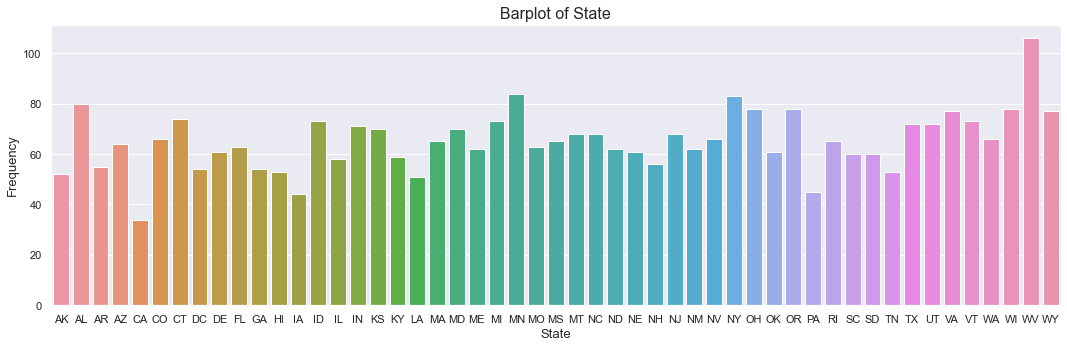

In [19]:
# sorting data by ascending State names
sorted_data = data.sort_values(by='State', ascending=True)

# plot barplot of state
plt.figure(figsize=(15,5))
sns.countplot(x='State', data=sorted_data)
plt.xlabel('State', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Barplot of State', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Customer phân bố khá đều ở hầu hết các States, phần lớn các States đều có số Customer trên 40.
* WV State có số lượng customer cao nhất (trên 100).
* CA State có số lượng customer thấp nhất (khoảng 32).

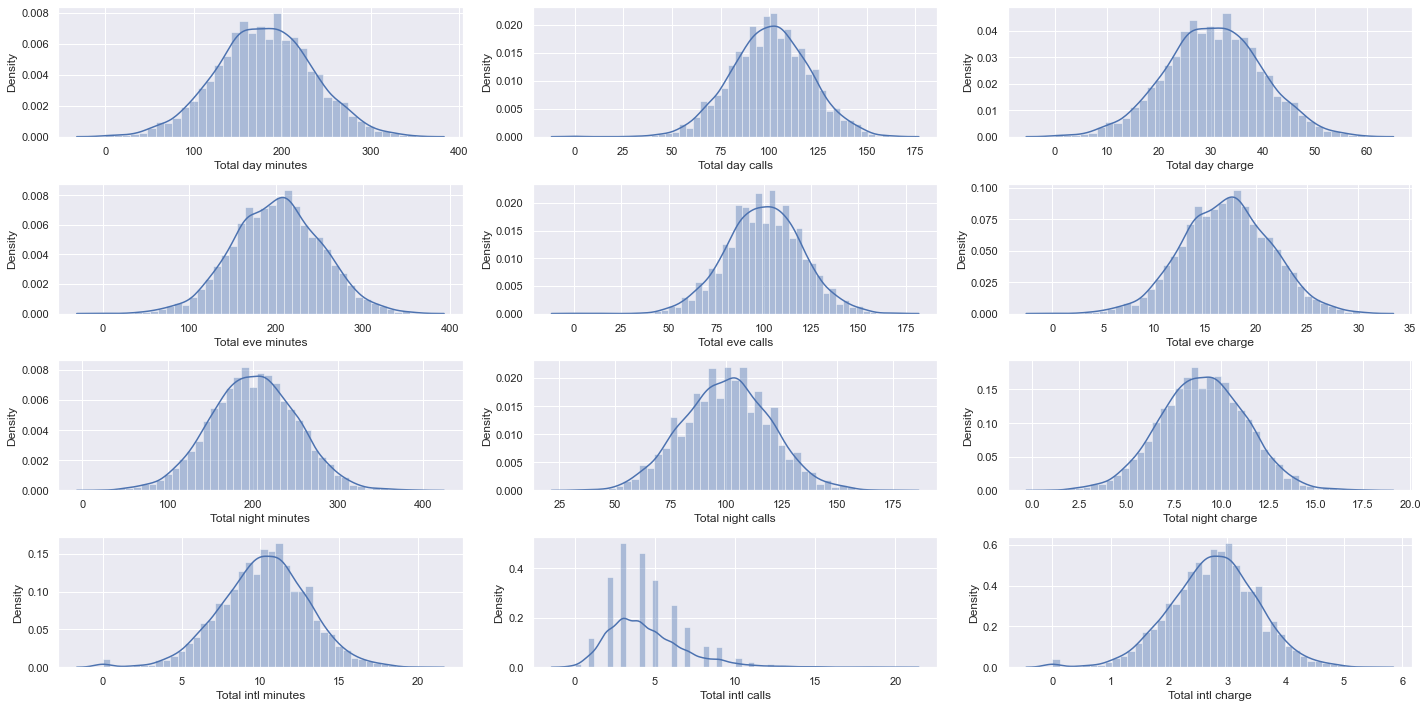

In [24]:
cols = ['Total day minutes', 'Total day calls', 'Total day charge',
        'Total eve minutes', 'Total eve calls', 'Total eve charge',
        'Total night minutes', 'Total night calls', 'Total night charge',
        'Total intl minutes', 'Total intl calls', 'Total intl charge',]

fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(20,10))
for i, c in zip(ax.flatten(), cols):
    sns.distplot(data[c], ax=i)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Các features `Total day minutes`, `Total day calls`, `Total day charge`, `Total eve minutes`, `Total eve calls`, `Total eve charge`, `Total night minutes`, `Total night calls`, `Total night charge`, `Total intl minutes`, `Total intl charge` đều có phân phối tuân theo phân phối chuẩn.
* `Total intl calls` bị lệch phải và có mật độ thưa thớt hơn rất nhiều so với các features còn lại.

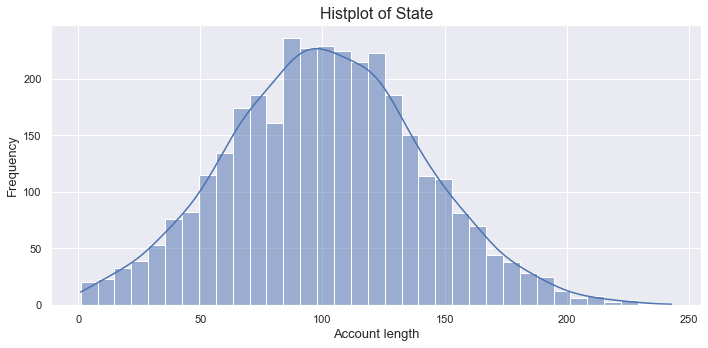

In [36]:
# plot histplot of state
plt.figure(figsize=(10,5))
sns.histplot(x='Account length', data=data, kde=True)
plt.xlabel('Account length', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Histplot of State', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Phân phối của feature `Account length` tuân theo phân phối chuẩn.
* Phần lớn khách hàng sử dụng dịch vụ viễn thông có thời gian sử dụng nằm trong khoảng từ 70 - 130 ngày.

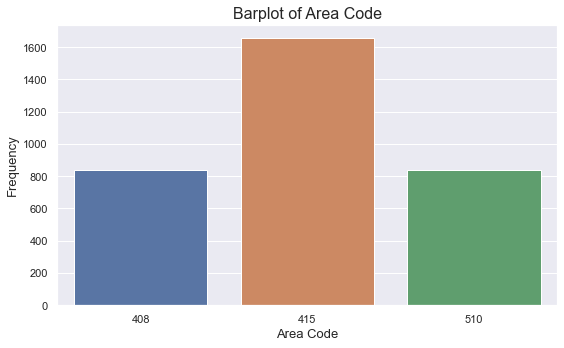

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x='Area code', data=data)
plt.xlabel('Area Code', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Barplot of Area Code', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Số lượng khách hàng có `Phone number prefix` là 415 chiếm nhiều nhất với hơn 1600 khách hàng.
* 2 mã vùng còn lại `408` và `510` có cùng lượng khách hàng (khoảng hơn 800 khách hàng).

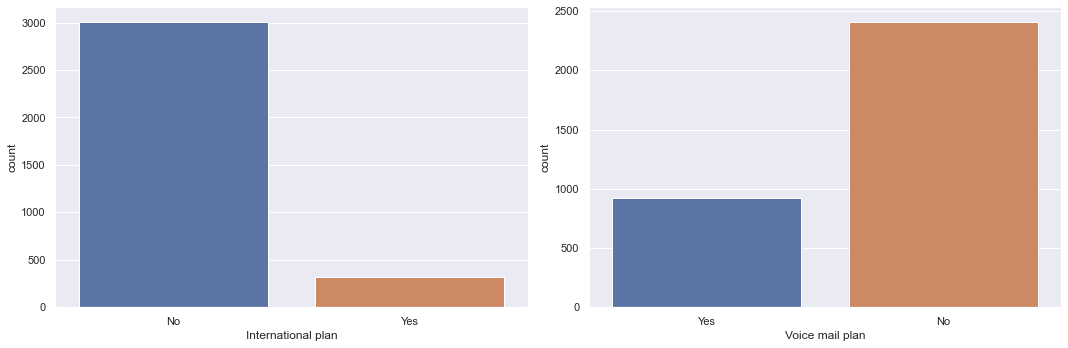

In [39]:
cols = ['International plan', 'Voice mail plan']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for i, c in zip(ax.flatten(), cols):
    sns.countplot(x = c, data = data, ax = i)
    
plt.tight_layout()
plt.show()

**Nhận xét:**
* Số lượng khách hàng sử dụng dịch vụ `International plan` và `Voice mail plan` khá thấp.
* Số lượng khách hàng không dùng `International plan` cao gấp khoảng 8.5 lần so với lượng khách hàng chọn dùng.
* Số lượng khách hàng không dùng `Voice mail plan` cao gấp khoảng 2.5 lần so với lượng khách hàng chọn dùng.

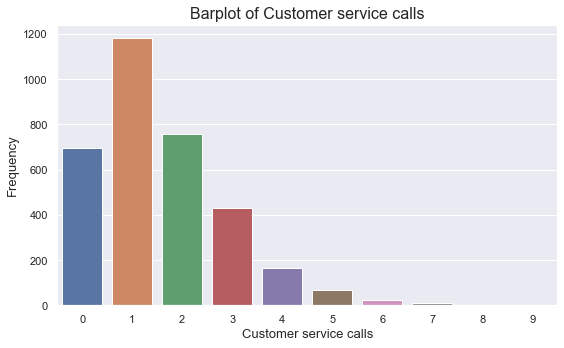

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(x='Customer service calls', data=data)
plt.xlabel('Customer service calls', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Barplot of Customer service calls', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Hầu hết các khách hàng gọi đến dịch vụ chăm sóc khách hàng nhiều nhất khoảng 1 - 2 cuộc gọi.
* Có một số khách hàng có nhiều hơn 5 cuộc gọi đến bộ phận này nhưng số lượng này rất ít.

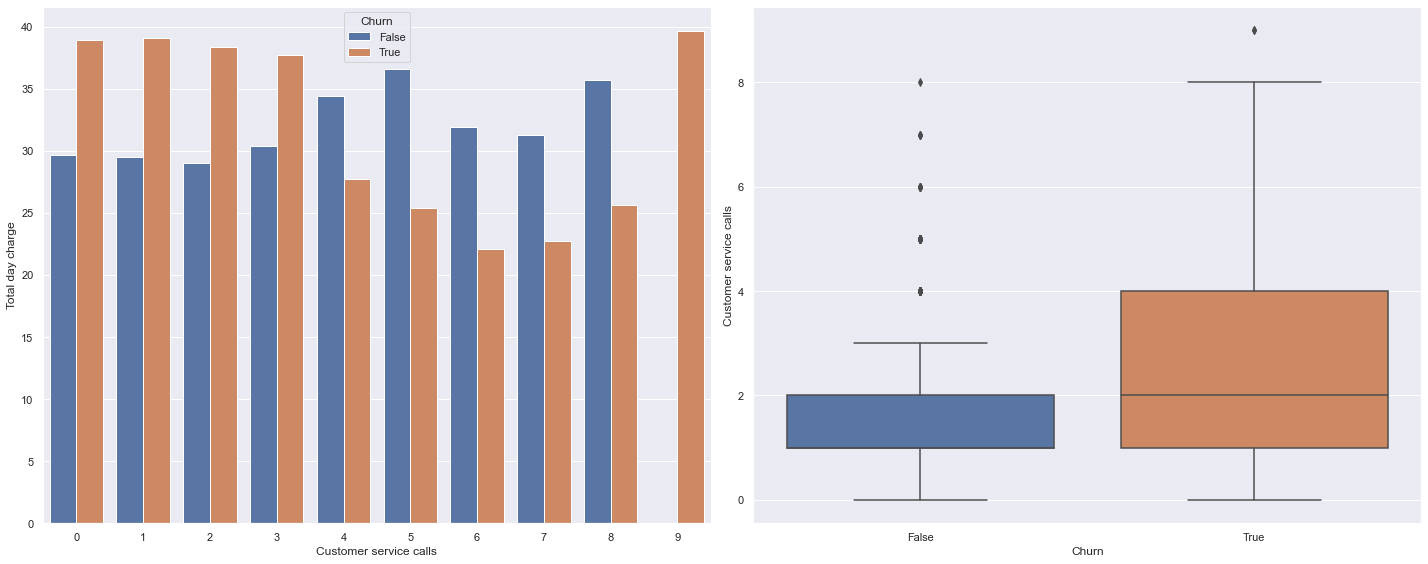

In [47]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,8))
sns.barplot(data = data, x = 'Customer service calls', y = 'Total day charge', hue = 'Churn', ci = False, ax = ax[0])
sns.boxplot(data = data, y = 'Customer service calls', x = 'Churn', ax = ax[1])
plt.tight_layout()
plt.show()

**Nhận xét:**
* Từ boxplot ta thấy số lượng khách hàng chọn từ bỏ dịch vụ thường có xu hướng gọi đến dịch vụ chăm sóc khách hàng nhiều hơn.
* Ta thấy rằng số lần có cuộc gọi đến dịch vụ khách hàng nhiều hơn 7 thì khả năng cao sẽ huỷ bỏ dịch vụ (nổi bật nhất những khách hàng thực hiện 9 cuộc gọi đều huỷ dịch vụ). Hơn nữa, khả năng huỷ dịch vụ cũng đến từ khoản phí áp đặt cho khách hàng quá cao nếu càng thực hiện nhiều cuộc gọi.
* Ngoài ra, ta cũng có thể thấy một lượng khách hàng chọn huỷ dịch vụ do phí gọi đến dịch vụ khách hàng quá cao mặc dù chỉ thực hiện 1-3 cuộc gọi.

<Figure size 1080x576 with 0 Axes>

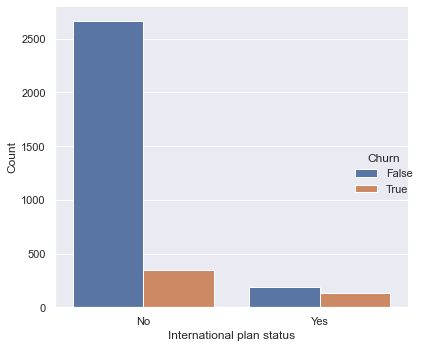

In [49]:
plt.figure(figsize = (15,8))
sns.catplot(data = data, x ='International plan', hue = 'Churn',
           kind = 'count')
plt.xlabel('International plan status', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Nhìn chung lượng người dùng có `International plan` chiếm tỷ trọng rất ít.
* Số lượng người dùng không có `International plan` thường chọn ở lại nhiều hơn rất nhiều so với lượng người từ bỏ (gấp khoảng 6 lần).
* Tỷ lệ người dùng ở lại và huỷ đăng ký dịch vụ trong thị phần `International plan` tương đương nhau.

<Figure size 1080x432 with 0 Axes>

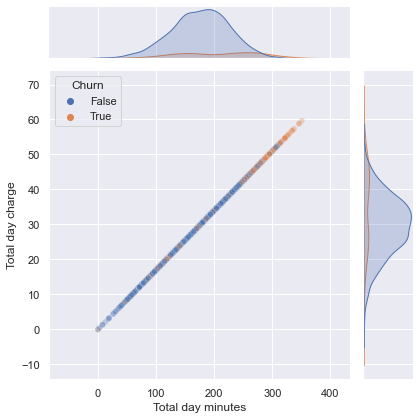

In [50]:
plt.figure(figsize = (15,6))
sns.jointplot(data = data, x = 'Total day minutes', y = 'Total day charge',
                hue = 'Churn', alpha = 0.3)
plt.xlabel('Total Day Minutes', fontsize = 13)
plt.ylabel('Total Day Charges', fontsize = 13)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Ta có thể thấy được mối quan hệ tuyến tính giữa 2 features này.
* Người dùng thường có xu hướng huỷ đăng ký dịch vụ vì thời lượng gọi càng lâu thì phí càng cao.

#### BigMartSales Dataset

In [51]:
data = pd.read_csv('Dataset/BigMartSales.csv')


print(">> Display the first 5 rows of data:")
display(data.head())
print(">> Shape of data: ", data.shape)
print("   * Number of rows: ", data.shape[0])
print("   * Number of columns: ", data.shape[1])

>> Display the first 5 rows of data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


>> Shape of data:  (8523, 12)
   * Number of rows:  8523
   * Number of columns:  12


**Data Description**

Given sales data for 1559 products across 10 stores of the Big Mart chain in various cities the task is to build a model to predict sales for each particular product in different stores.

| Variable | Type | Subtype | Description |
| :- | -:- | -:- | :- |
| Item_Identifier | Numeric | Discrete | Unique Product ID |
| Item_Weight | Numeric | Continuous | Weight of product |
| Item_Fat_Content | Categorical | Ordinal | Whether the product is low fat or not |
| Item_Visibility | Numeric | Continuous | % of total display area in store allocated to this product |
| Item_Type | Categorical | Nominal | Category to which product belongs |
| Item_MRP | Numeric | Discrete | Maximum Retail Price (list price) of product |
| Outlet_Identifier | Numeric | Discrete | Unique store ID |
| Outlet_Establishment_Year | Numeric | Discrete | Year in which store was established |
| Outlet_Size | Categorical | Ordinal | Size of the store |
| Outlet_Location_Type | Categorical | Ordinal | Type of city in which store is located |
| Outlet_Type | Categorical | Ordinal | Grocery store or some sort of supermarket |
| Item_Outlet_Sales | Numeric | Discrete | Sales of product in particular store. This is the outcome variable to be predicted. |

In [52]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Nhận xét:** 
* Bộ dữ liệu có 8523 dòng và 12 cột, trong đó cột `Item_Outlet_Sales` là outcome.
* Có 2 cột có missing value là `Item_Weight` và `Outlet_Size`.

In [54]:
missing_value_info = find_missing_percent(data)

* Check missing values:
>> Shape of data:  (8523, 12)
>> The table of percentage of missing values:


,ColumnName,TotalMissingValues,PercentOfMissing
0,Outlet_Size,2410,0.282764
1,Item_Weight,1463,0.171653


Trước khi tiến hành EDA, ta fillna bằng giá trị trung bình của cột tương ứng.

In [56]:
# Imputation
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
missing_value_info = find_missing_percent(data)

* Check missing values:
>> Shape of data:  (8523, 12)
>> There is no missing value in this data.


In [55]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


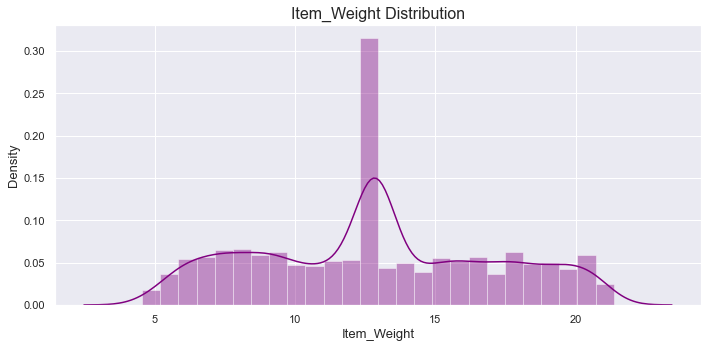

In [64]:
plt.figure(figsize=(10,5))
sns.distplot(data['Item_Weight'], color='purple')
plt.xlabel('Item_Weight', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title('Item_Weight Distribution', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Ta thấy rằng item weight dao động từ khoảng 5 - 20kg. Trong đó, số lượng lớn nhất rơi vào mặt hàng có weight khoảng 12kg.
* Giá trị weight trung bình của 8523 products là khoảng 12.85kg.

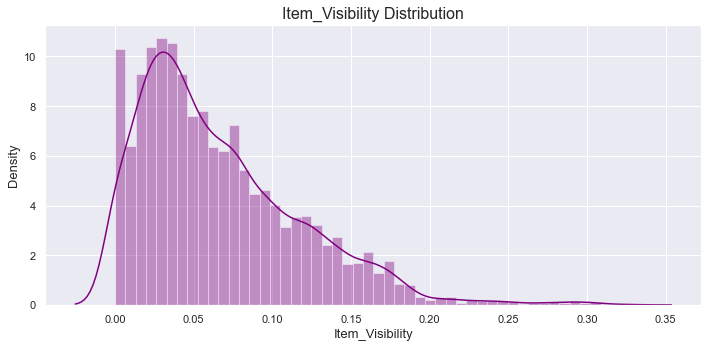

In [65]:
plt.figure(figsize=(10,5))
sns.distplot(data['Item_Visibility'], color='purple')
plt.xlabel('Item_Visibility', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title('Item_Visibility Distribution', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Ta thấy rằng phân phối của feature `Item_Visibility` bị lệch phải khá nhiều.
* Phần lớn các sản phẩm có tỷ lệ xuất hiện trong cửa hàng dưới 10%.

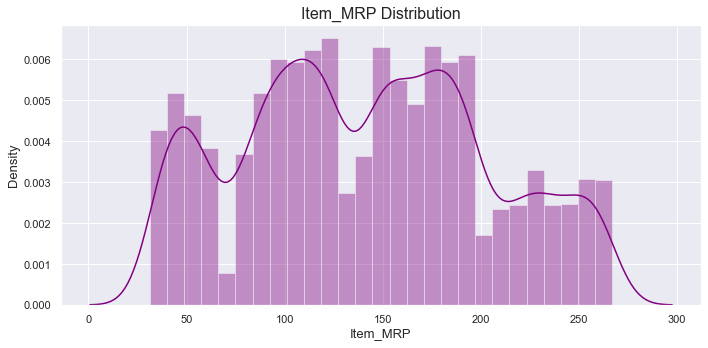

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(data['Item_MRP'], color='purple')
plt.xlabel('Item_MRP', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title('Item_MRP Distribution', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Phần lớn sản phẩm có giá bán lẻ tốt nhất ở khoảng 50, 100 và 200 MRP, còn các khoảng mức còn lại số lượng khá ít.
* Ta cũng có nhiều sản phẩm hơn trong khoảng mức 100 - 180 MRP.

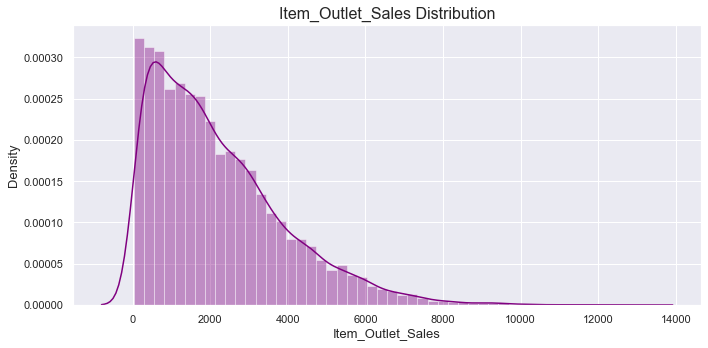

In [67]:
plt.figure(figsize=(10,5))
sns.distplot(data['Item_Outlet_Sales'], color='purple')
plt.xlabel('Item_Outlet_Sales', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title('Item_Outlet_Sales Distribution', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:** Biểu đồ trên bị lệch phải rõ rệt.

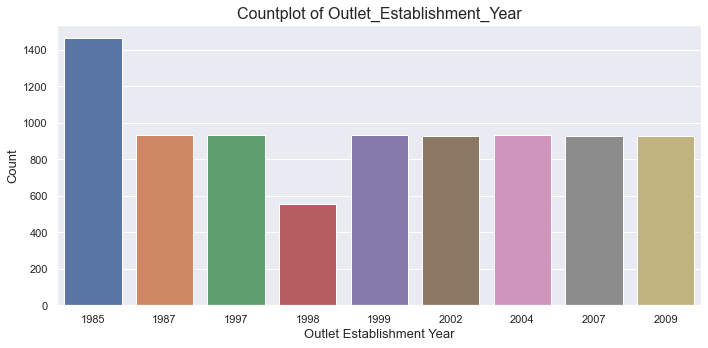

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.xlabel('Outlet Establishment Year', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Countplot of Outlet_Establishment_Year', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Các cửa hàng trong bộ dữ liệu được thành lập từ năm 1985 kéo dài đến năm 2009.
* Số lượng cửa hàng được thành lập vào năm 1985 chiếm nhiều nhất (khoảng hơn 1400 cửa hàng) và số lượng thấp nhất rơi vào năm 1998 (khoảng gần 600 cửa hàng).
* Có sự tương đồng về số lượng cửa hàng được thành lập ở các năm còn lại (khoảng hơn 900 cửa hàng mỗi năm).

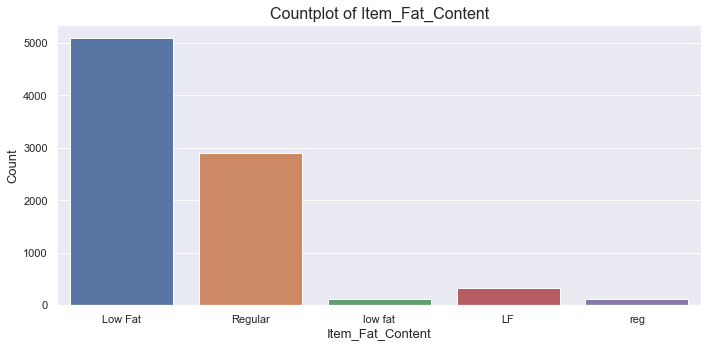

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Fat_Content', data=data)
plt.xlabel('Item_Fat_Content', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Countplot of Item_Fat_Content', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:**
* Từ biểu đồ, ta thấy rằng dữ liệu cần được xử lý vì có các cột có cùng ý nghĩa như `Low Fat`, `low fat`, `LF` cùng chỉ giá trị cho `Low Fat` và `Regular`, `reg` cùng chỉ cho `Regular`.

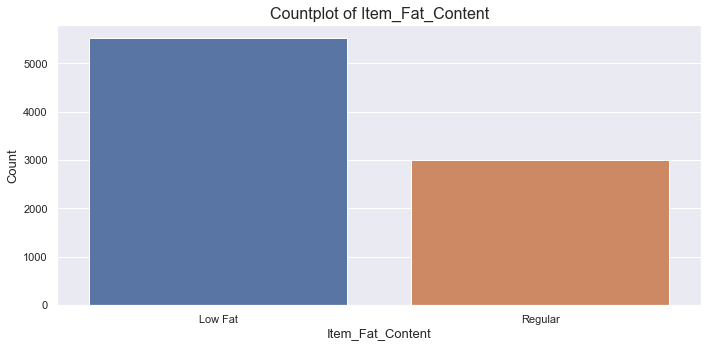

In [82]:
data.loc[(data['Item_Fat_Content'] == 'low fat') | (data['Item_Fat_Content'] == 'LF'), 'Item_Fat_Content'] = 'Low Fat'
data.loc[(data['Item_Fat_Content'] == 'reg'), 'Item_Fat_Content'] = 'Regular'

plt.figure(figsize=(10,5))
sns.countplot(x='Item_Fat_Content', data=data)
plt.xlabel('Item_Fat_Content', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Countplot of Item_Fat_Content', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:** Ta cũng thấy rằng lượng sản phẩm ít chất béo chiếm số lượng nhiều hơn và gấp khoảng 1.5 lần số lượng sản phẩm `Regular`.

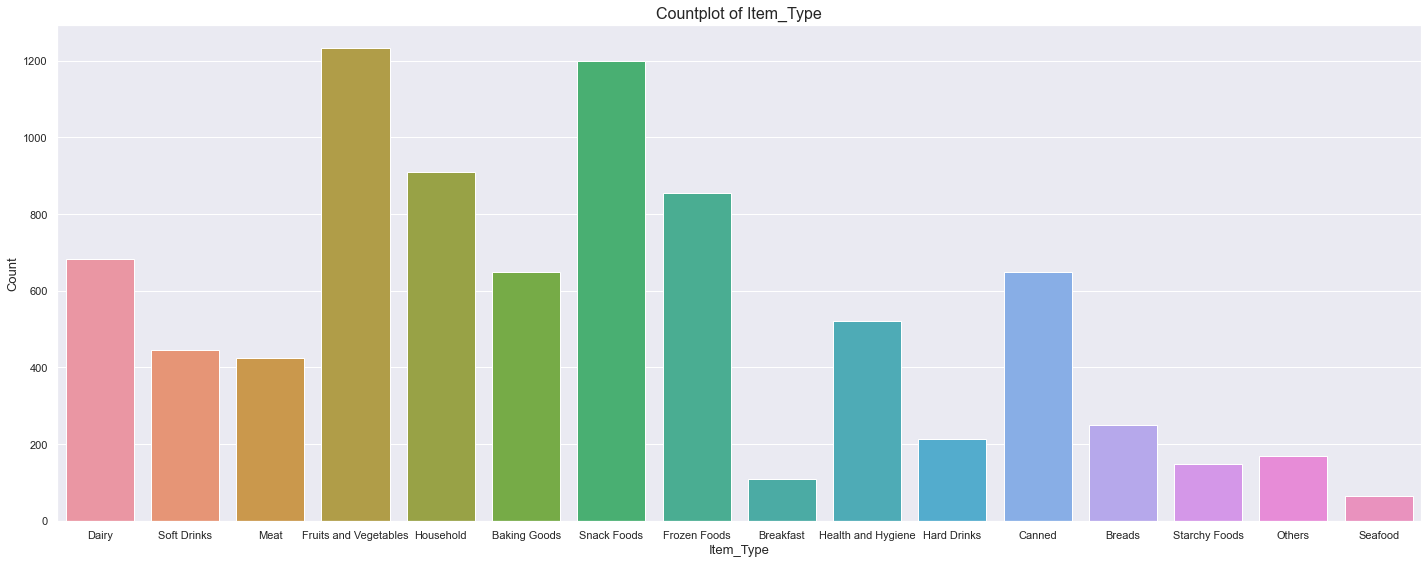

In [72]:
plt.figure(figsize=(20,8))
sns.countplot(x='Item_Type', data=data)
plt.xlabel('Item_Type', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Countplot of Item_Type', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:** Trong 16 loại sản phẩm ở trên, ta thấy rằng số lượng sản phẩm thuộc loại `Fruits and Vegetable` và `Snack Foods` chiếm số lượng nhiều nhất (khoảng hơn 1200 sản phẩm) và sản phẩm `Seafood` và `Breakfast` chiếm số lượng ít nhất (khoảng dưới 150 sản phẩm).

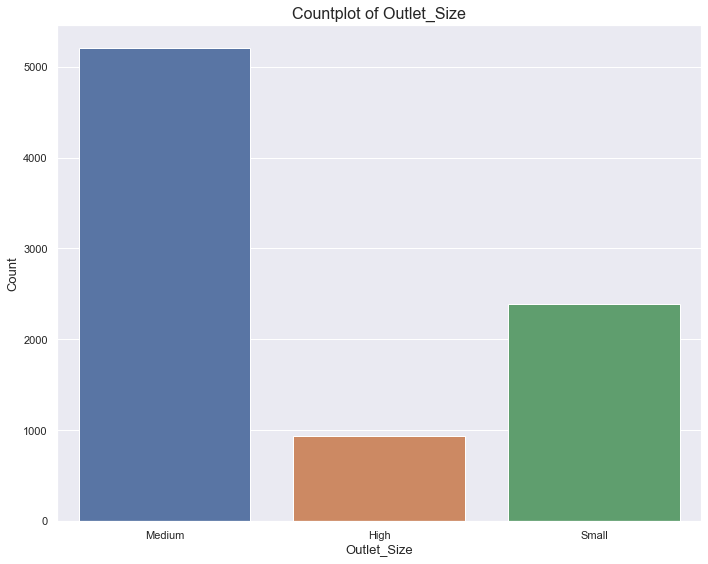

In [76]:
plt.figure(figsize=(10,8))
sns.countplot(x='Outlet_Size', data=data)
plt.xlabel('Outlet_Size', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Countplot of Outlet_Size', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:** Ta thấy rằng số lượng sản phẩm có kích thước `Medium` chiếm số lượng khá cao (khoảng hơn 5000 sản phẩm) và cao gấp 5 lần  lượng thấp nhất ở kích thước `High`.

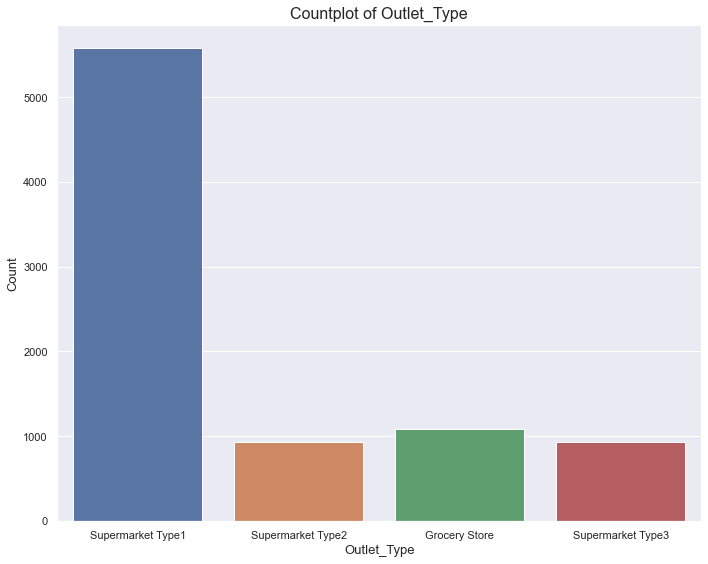

In [77]:
plt.figure(figsize=(10,8))
sns.countplot(x='Outlet_Type', data=data)
plt.xlabel('Outlet_Type', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Countplot of Outlet_Type', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:** `Supermarket Type1` có số lượng cao nhất (khoảng gần 6000 đối tượng) và cao gấp khoảng 6 lần so với các loại còn lại.

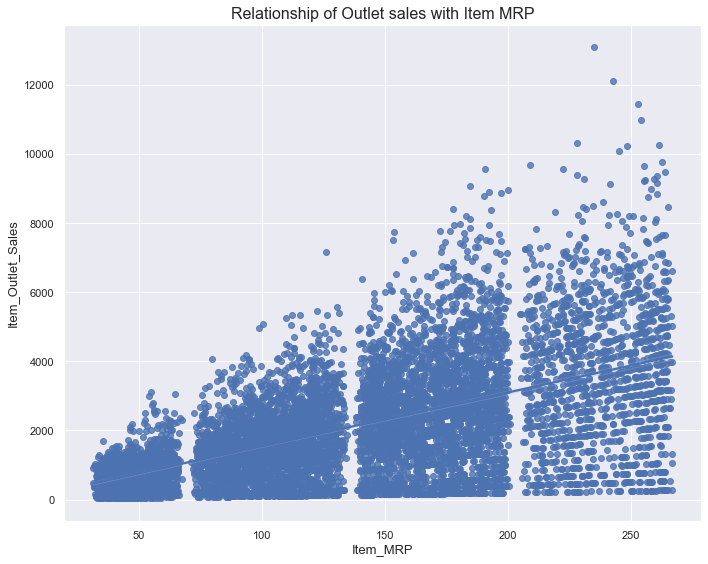

In [78]:
plt.figure(figsize=(10,8))
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales', data=data)
plt.xlabel('Item_MRP', fontsize=13)
plt.ylabel('Item_Outlet_Sales', fontsize=13)
plt.title('Relationship of Outlet sales with Item MRP', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:** Ta có thể nói rằng, mối quan hệ giữa giá bán lẻ và doanh số bán hàng là tuyến tính, tức là giá bán lẻ trung bình càng cao thì doanh số bán hàng của các cửa hàng càng cao.

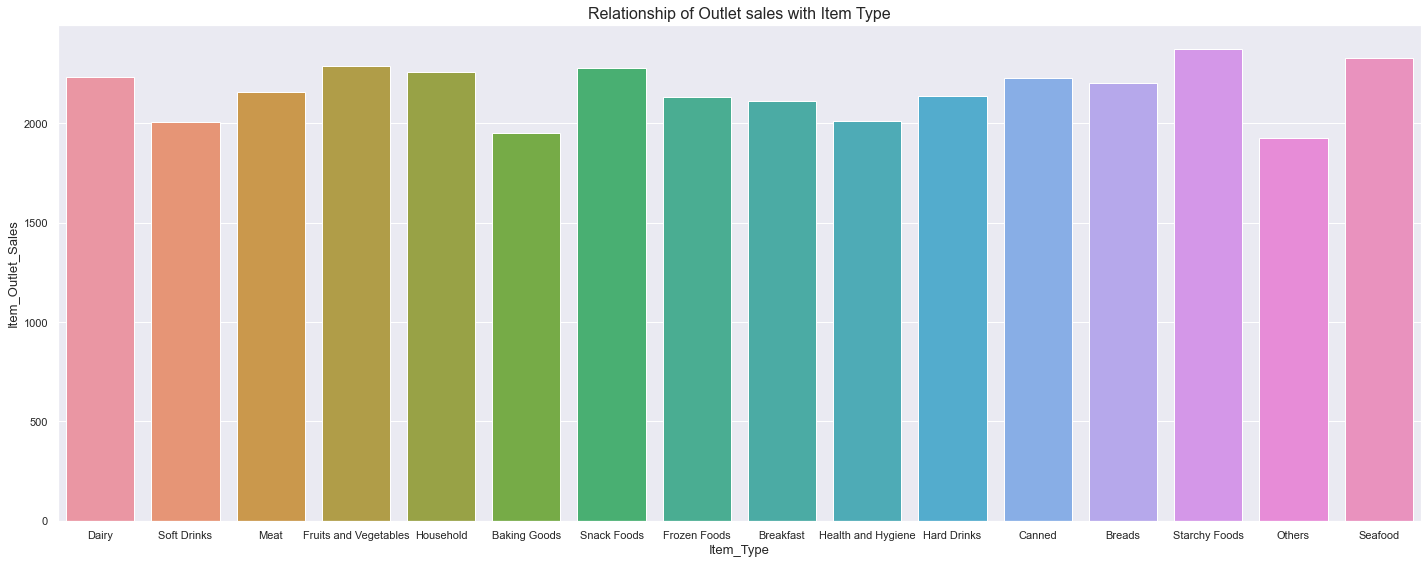

In [81]:
plt.figure(figsize=(20,8))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data, ci=False)
plt.xlabel('Item_Type', fontsize=13)
plt.ylabel('Item_Outlet_Sales', fontsize=13)
plt.title('Relationship of Outlet sales with Item Type', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:** Từ biểu đồ trên, ta thấy rằng các mặt hàng như `Fruits and Vegetable`, `Household Goods`, `Snacks`, `Starchy Foods` và `Seafood` được bán nhiều hơn các mặt hàng khác. Vì thế các trung tâm thương mại có thể xem xét nên trữ nhiều mặt hàng này trong kho, cung cấp những ưu đãi phù hợp cho những mặt hàng này có thể gia tăng số lượng bán hàng.

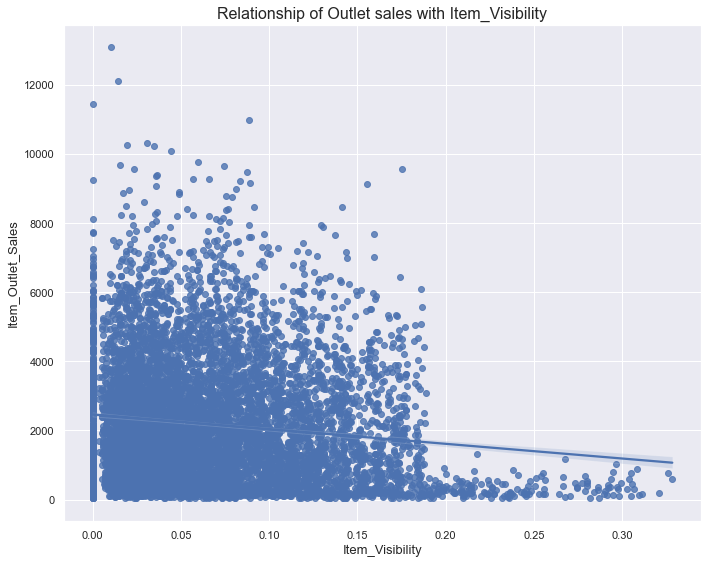

In [83]:
plt.figure(figsize=(10,8))
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales', data=data)
plt.xlabel('Item_Visibility', fontsize=13)
plt.ylabel('Item_Outlet_Sales', fontsize=13)
plt.title('Relationship of Outlet sales with Item_Visibility', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:** 
* Ta thấy rằng, tỷ lệ xuất hiện của các mặt hàng càng thấp thì doanh thu của mặt hàng đó tại các cửa hàng càng cao.
* Đặc biệt, nếu tỷ lệ xuất hiện của mặt hàng từ khoảng 0.2 trở lên thì doanh thu thu lại cực kỳ thấp.